In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from collections import namedtuple

In [3]:
logs = {'cifar-resnet':{}, 
        'cifar-preact':{}, 
        'olivetti-resnet':{}, 
        'olivetti-preact':{}
}

In [4]:
for x in logs.keys():
    logs[x]['train-loss'] = []
    logs[x]['test-loss'] = []
    logs[x]['test-acc'] = []

In [5]:
LogPath = namedtuple('LogPath', ['key', 'path'])

In [6]:
paths = [
    LogPath('cifar-resnet', 'trainLogs/cifar/resnet/no.log'),
    LogPath('cifar-preact', 'trainLogs/cifar/preact/no.log'),
    LogPath('olivetti-resnet', 'trainLogs/olivetti/resnet/no-train.log'),
    LogPath('olivetti-preact', 'trainLogs/olivetti/preact/no/no-train.log'),
]
for pathObj in paths:
    with open(pathObj.path, 'r') as f:
        lines_cor = f.readlines()
        lines_cor = lines_cor[2:403]
        for i,line in enumerate(lines_cor):
            if i % 4 == 1:
                logs[pathObj.key]['train-loss'].append(float(line.split()[2]))
            if i % 4 == 2:
                logs[pathObj.key]['test-loss'].append(float(line.split()[2]))
            if i % 4 == 3:
                logs[pathObj.key]['test-acc'].append(float(line.split()[2]))

In [10]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="./simhei.ttf")
import pylab as p

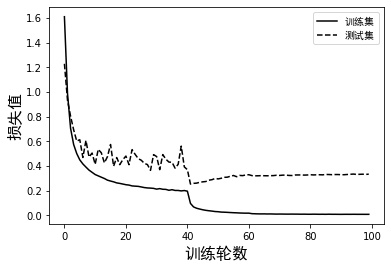

In [12]:
cor = 1.0
i = 0
shape = ['-k', '--k', '-.k', ':k']

plt.plot([x for x in range(100)],[x for x in logs['cifar-resnet']['train-loss']], '-k' , label="训练集")
plt.plot([x for x in range(100)],[float(x) for x in logs['cifar-resnet']['test-loss']], '--k' , label="测试集")

plt.xlabel('训练轮数',FontProperties=my_font,fontsize=16)
plt.ylabel('损失值',FontProperties=my_font,fontsize=16)
lg = plt.legend(prop=my_font)
lg.get_title().set_fontsize(fontsize=16)
plt.show()

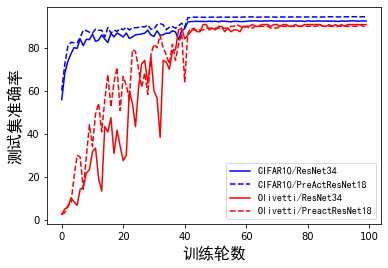

In [15]:
shape = ['-b', '--b', '-r', '--r']
model = ['CIFAR10/ResNet34', 'CIFAR10/PreActResNet18', 'Olivetti/ResNet34', 'Olivetti/PreactResNet18']
for i, obj in enumerate(paths):
    plt.plot([x for x in range(100)],[x for x in logs[obj.key]['test-acc']], shape[i],label=model[i])
    plt.xlabel('训练轮数',FontProperties=my_font,fontsize=16)
    plt.ylabel('测试集准确率',FontProperties=my_font,fontsize=16)
plt.legend(prop=my_font,fontsize=16)
plt.show()